In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/github-daily-trending-repos/github_daily_trending.csv


In [2]:
!ls

__notebook__.ipynb


In [3]:
df = pd.read_csv('/kaggle/input/github-daily-trending-repos/github_daily_trending.csv')
df.head()

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
4,JanDeDobbeleer,oh-my-posh,https://github.com/JanDeDobbeleer/oh-my-posh,The most customisable and low-latency cross pl...,Go,17450.0,2390.0,16,2024-11-17,go


In [4]:
df.isna().sum()

org_name               0
repo_name              0
repo_url               0
description            0
language              74
star                 156
forks                156
daily_star             0
date                   0
trending_category      0
dtype: int64

In [5]:
df.describe(include='all')

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
count,12432,12432,12432,12432,12358,12276.000000,12276.000000,12432.000000,12432,12432
unique,2044,2473,2515,2563,35,NaN,NaN,NaN,81,8
top,JetBrains,metasploit-framework,https://github.com/rapid7/metasploit-framework,No description,Rust,NaN,NaN,NaN,2024-11-15,rust
freq,122,59,59,109,1924,NaN,NaN,NaN,171,1853
mean,NaN,NaN,NaN,NaN,NaN,23532.086347,3706.084229,76.185972,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,39536.411889,7426.706566,239.753693,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,20.000000,3.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,4589.000000,499.000000,5.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,11849.000000,1341.000000,15.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,26171.000000,3571.000000,50.000000,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12432 entries, 0 to 12431
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   org_name           12432 non-null  object 
 1   repo_name          12432 non-null  object 
 2   repo_url           12432 non-null  object 
 3   description        12432 non-null  object 
 4   language           12358 non-null  object 
 5   star               12276 non-null  float64
 6   forks              12276 non-null  float64
 7   daily_star         12432 non-null  int64  
 8   date               12432 non-null  object 
 9   trending_category  12432 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 971.4+ KB


<Axes: >

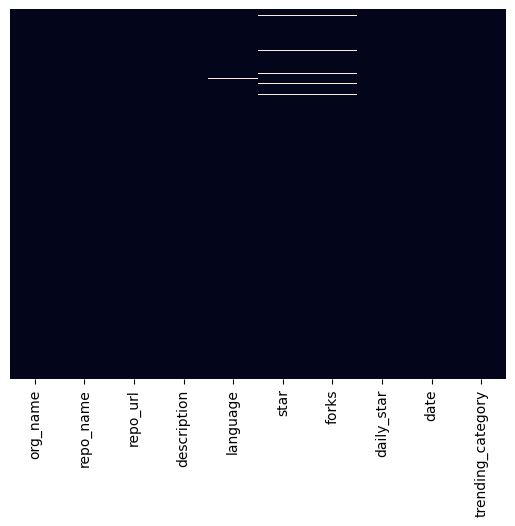

In [7]:
sns.heatmap(data=df.isna(), cbar=False, yticklabels=False)

In [8]:
df.columns

Index(['org_name', 'repo_name', 'repo_url', 'description', 'language', 'star',
       'forks', 'daily_star', 'date', 'trending_category'],
      dtype='object')

In [9]:
df.head()

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
4,JanDeDobbeleer,oh-my-posh,https://github.com/JanDeDobbeleer/oh-my-posh,The most customisable and low-latency cross pl...,Go,17450.0,2390.0,16,2024-11-17,go


In [10]:
df['language'].unique()

array(['Go', 'Python', 'Rust', 'Ruby', 'Kotlin', 'Makefile',
       'Jupyter Notebook', 'TypeScript', 'Svelte', 'C', 'Markdown', 'C++',
       'C#', nan, 'Java', 'HTML', 'JavaScript', 'PHP', 'Shell', 'CSS',
       'MDX', 'Swift', 'Dart', 'Vue', 'LLVM', 'PowerShell', 'Blade',
       'Haskell', 'Zig', 'Lua', 'Elixir', 'PureScript', 'Scala', 'CMake',
       'Clojure', 'Dockerfile'], dtype=object)

In [11]:
df.loc[df['language'] == 'Python']['description']

437      Learn how to design large-scale systems. Prep ...
438                                Stable Diffusion web UI
439                   Free, open source crypto trading bot
440              A recursive internet scanner for hackers.
441      The official gpt4free repository | various col...
                               ...                        
12301    Qlib is an AI-oriented quantitative investment...
12302    Free and Open Source Enterprise Resource Plann...
12303       An open-sourced end-to-end VLM-based GUI Agent
12304    Annotate better with CVAT, the industry-leadin...
12305                                       No description
Name: description, Length: 1667, dtype: object

In [12]:
df['language'].isna().sum()

74

In [13]:
duplicate_df = df.copy()
duplicate_df.head()

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
4,JanDeDobbeleer,oh-my-posh,https://github.com/JanDeDobbeleer/oh-my-posh,The most customisable and low-latency cross pl...,Go,17450.0,2390.0,16,2024-11-17,go


In [14]:
duplicate_df.isna().sum()

org_name               0
repo_name              0
repo_url               0
description            0
language              74
star                 156
forks                156
daily_star             0
date                   0
trending_category      0
dtype: int64

### Fill NAN values 

In [15]:
fill_values = {'language':'unavailable language', 'star': df['star'].mean(), 'forks': df['forks'].mean()}
duplicate_df.fillna(fill_values, inplace=True)

In [16]:
duplicate_df['date']

0        2024-11-17
1        2024-11-17
2        2024-11-17
3        2024-11-17
4        2024-11-17
            ...    
12427    2025-01-25
12428    2025-01-25
12429    2025-01-25
12430    2025-01-25
12431    2025-01-25
Name: date, Length: 12432, dtype: object

### Convert Date column object to date_format using pd.to_datetime()

In [17]:
duplicate_df['date'] = pd.to_datetime(duplicate_df['date'], errors='coerce')


In [18]:
duplicate_df.isna().sum()

org_name             0
repo_name            0
repo_url             0
description          0
language             0
star                 0
forks                0
daily_star           0
date                 0
trending_category    0
dtype: int64

In [19]:
duplicate_df.head()

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
4,JanDeDobbeleer,oh-my-posh,https://github.com/JanDeDobbeleer/oh-my-posh,The most customisable and low-latency cross pl...,Go,17450.0,2390.0,16,2024-11-17,go


<Axes: >

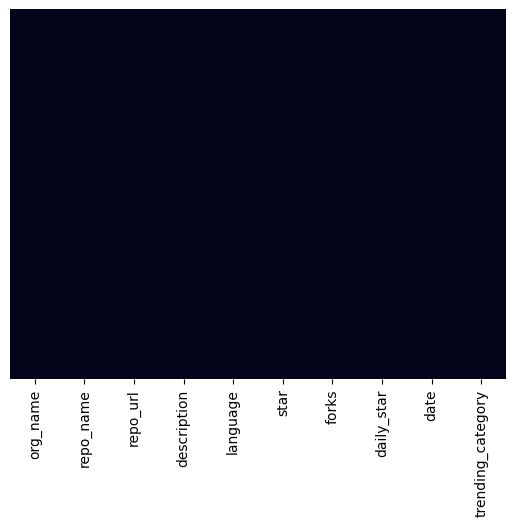

In [20]:
sns.heatmap(data=duplicate_df.isna(), cbar=False, yticklabels=False)

<Axes: title={'center': 'Trending Category Language'}, xlabel='count', ylabel='trending_category'>

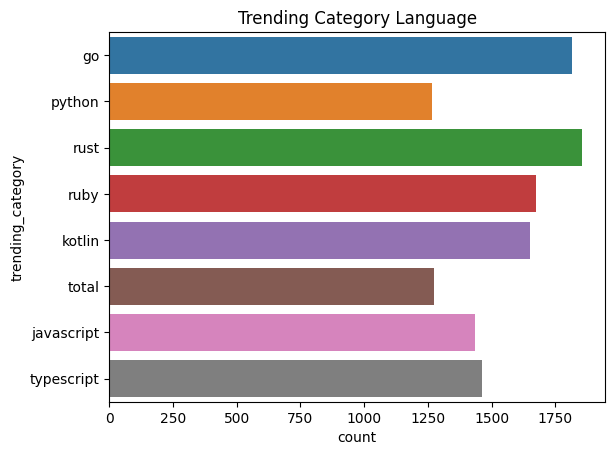

In [21]:
plt.title('Trending Category Language')
sns.countplot(y='trending_category', data=duplicate_df)

In [22]:
duplicate_df[duplicate_df['trending_category'] == 'python']

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
437,donnemartin,system-design-primer,https://github.com/donnemartin/system-design-p...,Learn how to design large-scale systems. Prep ...,Python,276079.0,46342.0,211,2024-11-17,python
438,AUTOMATIC1111,stable-diffusion-webui,https://github.com/AUTOMATIC1111/stable-diffus...,Stable Diffusion web UI,Python,142992.0,26951.0,63,2024-11-17,python
439,freqtrade,freqtrade,https://github.com/freqtrade/freqtrade,"Free, open source crypto trading bot",Python,29089.0,6208.0,24,2024-11-17,python
440,blacklanternsecurity,bbot,https://github.com/blacklanternsecurity/bbot,A recursive internet scanner for hackers.,Python,5680.0,464.0,209,2024-11-17,python
441,xtekky,gpt4free,https://github.com/xtekky/gpt4free,The official gpt4free repository | various col...,Python,61291.0,13327.0,18,2024-11-17,python
...,...,...,...,...,...,...,...,...,...,...
12301,microsoft,qlib,https://github.com/microsoft/qlib,Qlib is an AI-oriented quantitative investment...,Python,16157.0,2746.0,63,2025-01-25,python
12302,frappe,erpnext,https://github.com/frappe/erpnext,Free and Open Source Enterprise Resource Plann...,Python,23011.0,7634.0,155,2025-01-25,python
12303,THUDM,CogAgent,https://github.com/THUDM/CogAgent,An open-sourced end-to-end VLM-based GUI Agent,Python,616.0,43.0,10,2025-01-25,python
12304,cvat-ai,cvat,https://github.com/cvat-ai/cvat,"Annotate better with CVAT, the industry-leadin...",Python,13057.0,3101.0,10,2025-01-25,python


In [23]:
duplicate_df.head()

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
4,JanDeDobbeleer,oh-my-posh,https://github.com/JanDeDobbeleer/oh-my-posh,The most customisable and low-latency cross pl...,Go,17450.0,2390.0,16,2024-11-17,go


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


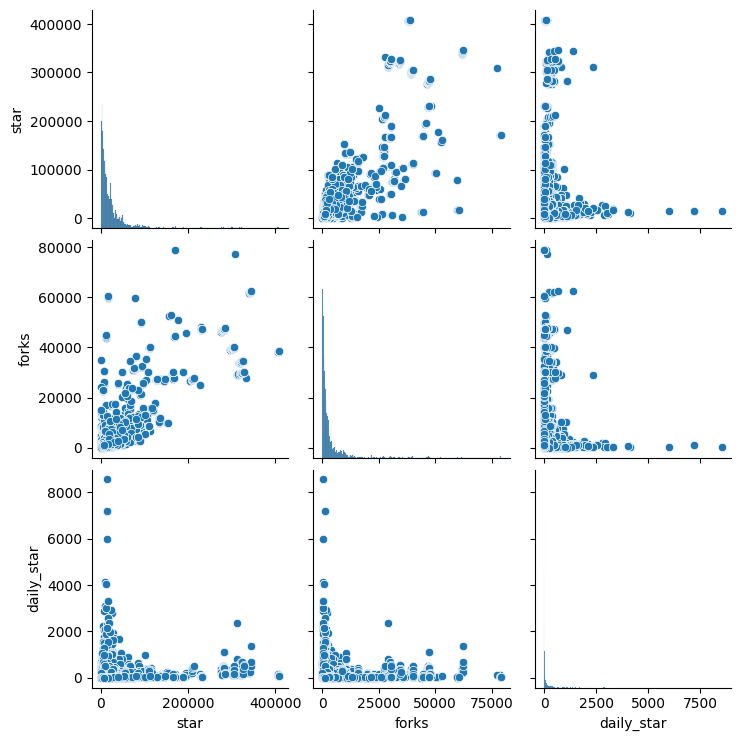

In [24]:
sns.pairplot(data=duplicate_df)

<Axes: xlabel='daily_star', ylabel='date'>

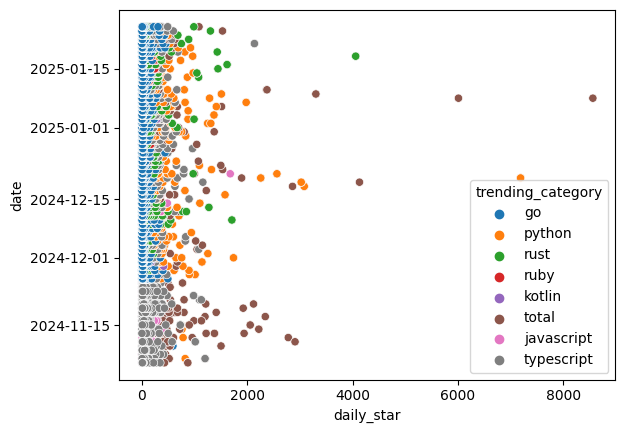

In [25]:
sns.scatterplot(data=duplicate_df, x='daily_star', y='date', hue='trending_category')

In [26]:
duplicate_df['date'].unique()

<DatetimeArray>
['2024-11-17 00:00:00', '2024-11-18 00:00:00', '2024-11-08 00:00:00',
 '2024-11-21 00:00:00', '2024-11-10 00:00:00', '2024-11-16 00:00:00',
 '2024-11-14 00:00:00', '2024-11-22 00:00:00', '2024-11-07 00:00:00',
 '2024-11-15 00:00:00', '2024-11-25 00:00:00', '2024-11-20 00:00:00',
 '2024-11-24 00:00:00', '2024-11-06 00:00:00', '2024-11-13 00:00:00',
 '2024-11-23 00:00:00', '2024-11-09 00:00:00', '2024-11-11 00:00:00',
 '2024-11-19 00:00:00', '2024-11-12 00:00:00', '2024-11-26 00:00:00',
 '2024-11-27 00:00:00', '2024-11-28 00:00:00', '2024-11-29 00:00:00',
 '2024-11-30 00:00:00', '2024-12-01 00:00:00', '2024-12-02 00:00:00',
 '2024-12-03 00:00:00', '2024-12-04 00:00:00', '2024-12-05 00:00:00',
 '2024-12-06 00:00:00', '2024-12-07 00:00:00', '2024-12-08 00:00:00',
 '2024-12-09 00:00:00', '2024-12-10 00:00:00', '2024-12-11 00:00:00',
 '2024-12-12 00:00:00', '2024-12-13 00:00:00', '2024-12-14 00:00:00',
 '2024-12-15 00:00:00', '2024-12-16 00:00:00', '2024-12-17 00:00:00',
 '20

In [27]:
duplicate_df['org_name'].unique()

array(['terrastruct', 'tinygo-org', 'Melkeydev', ..., 'cloudnative-pg',
       'k8sgpt-ai', 'metallb'], dtype=object)

<Axes: >

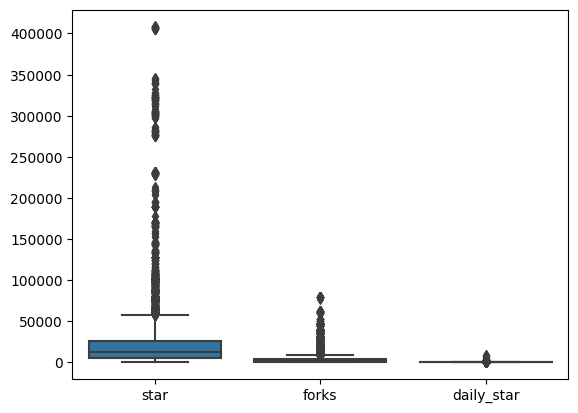

In [28]:
sns.boxplot(data=duplicate_df)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

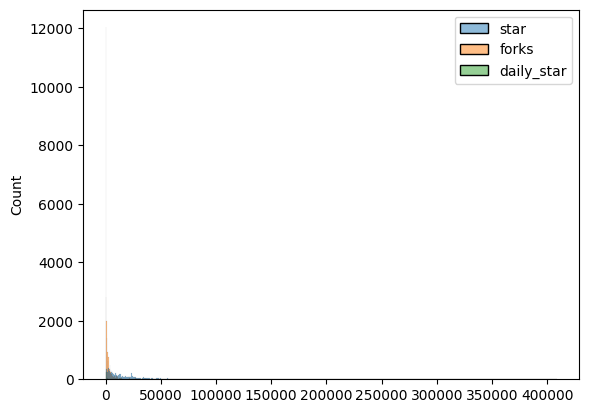

In [29]:
sns.histplot(data=duplicate_df)

In [30]:
df.loc[0:4, ['date']]

,date
0,2024-11-17
1,2024-11-17
2,2024-11-17
3,2024-11-17
4,2024-11-17


In [31]:
df.loc[0:5, ['date']]

,date
0,2024-11-17
1,2024-11-17
2,2024-11-17
3,2024-11-17
4,2024-11-17
5,2024-11-17


In [32]:
df.loc[:5, ['date']]

,date
0,2024-11-17
1,2024-11-17
2,2024-11-17
3,2024-11-17
4,2024-11-17
5,2024-11-17


In [33]:
df.loc[:4, ['date']]

,date
0,2024-11-17
1,2024-11-17
2,2024-11-17
3,2024-11-17
4,2024-11-17


In [34]:
df.head()

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
4,JanDeDobbeleer,oh-my-posh,https://github.com/JanDeDobbeleer/oh-my-posh,The most customisable and low-latency cross pl...,Go,17450.0,2390.0,16,2024-11-17,go


In [35]:
df.loc[(df['daily_star'] < 5) & (df['daily_star'] > 20), ['org_name', 'repo_name']]

,org_name,repo_name


In [36]:
df[df['daily_star'] > 20]

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
6,daytonaio,daytona,https://github.com/daytonaio/daytona,The Open Source Dev Environment Manager.,Go,10583.0,839.0,155,2024-11-17,go
8,milvus-io,milvus,https://github.com/milvus-io/milvus,"A cloud-native vector database, storage for ne...",Go,30702.0,2927.0,23,2024-11-17,go
13,FiloSottile,mkcert,https://github.com/FiloSottile/mkcert,A simple zero-config tool to make locally trus...,Go,50227.0,2626.0,94,2024-11-17,go
...,...,...,...,...,...,...,...,...,...,...
12412,kubernetes,kubernetes,https://github.com/kubernetes/kubernetes,Production-Grade Container Scheduling and Mana...,Go,112603.0,40092.0,54,2025-01-25,go
12414,ffuf,ffuf,https://github.com/ffuf/ffuf,Fast web fuzzer written in Go,Go,13207.0,1344.0,39,2025-01-25,go
12415,mk6i,retro-aim-server,https://github.com/mk6i/retro-aim-server,Open-source instant messaging server that make...,Go,495.0,25.0,42,2025-01-25,go
12416,cubefs,cubefs,https://github.com/cubefs/cubefs,cloud-native distributed storage,Go,4863.0,680.0,23,2025-01-25,go


In [37]:
df.loc[df['daily_star'] > 20]

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
6,daytonaio,daytona,https://github.com/daytonaio/daytona,The Open Source Dev Environment Manager.,Go,10583.0,839.0,155,2024-11-17,go
8,milvus-io,milvus,https://github.com/milvus-io/milvus,"A cloud-native vector database, storage for ne...",Go,30702.0,2927.0,23,2024-11-17,go
13,FiloSottile,mkcert,https://github.com/FiloSottile/mkcert,A simple zero-config tool to make locally trus...,Go,50227.0,2626.0,94,2024-11-17,go
...,...,...,...,...,...,...,...,...,...,...
12412,kubernetes,kubernetes,https://github.com/kubernetes/kubernetes,Production-Grade Container Scheduling and Mana...,Go,112603.0,40092.0,54,2025-01-25,go
12414,ffuf,ffuf,https://github.com/ffuf/ffuf,Fast web fuzzer written in Go,Go,13207.0,1344.0,39,2025-01-25,go
12415,mk6i,retro-aim-server,https://github.com/mk6i/retro-aim-server,Open-source instant messaging server that make...,Go,495.0,25.0,42,2025-01-25,go
12416,cubefs,cubefs,https://github.com/cubefs/cubefs,cloud-native distributed storage,Go,4863.0,680.0,23,2025-01-25,go


In [38]:
df.loc[df['language'].isin(['Go', 'Python'])]

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
4,JanDeDobbeleer,oh-my-posh,https://github.com/JanDeDobbeleer/oh-my-posh,The most customisable and low-latency cross pl...,Go,17450.0,2390.0,16,2024-11-17,go
...,...,...,...,...,...,...,...,...,...,...
12427,prometheus-community,postgres_exporter,https://github.com/prometheus-community/postgr...,A PostgreSQL metric exporter for Prometheus,Go,2894.0,760.0,2,2025-01-25,go
12428,putyy,res-downloader,https://github.com/putyy/res-downloader,视频号、小程序、抖音、快手、小红书、直播流、m3u8、酷狗、QQ音乐等常见网络资源下载!,Go,4522.0,622.0,33,2025-01-25,go
12429,metallb,metallb,https://github.com/metallb/metallb,A network load-balancer implementation for Kub...,Go,7255.0,930.0,4,2025-01-25,go
12430,spf13,cobra,https://github.com/spf13/cobra,A Commander for modern Go CLI interactions,Go,38964.0,2874.0,13,2025-01-25,go


In [39]:
df.loc[[0,1,2,4]]

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go
4,JanDeDobbeleer,oh-my-posh,https://github.com/JanDeDobbeleer/oh-my-posh,The most customisable and low-latency cross pl...,Go,17450.0,2390.0,16,2024-11-17,go


In [40]:
df.loc[4]

org_name                                                JanDeDobbeleer
repo_name                                                   oh-my-posh
repo_url                  https://github.com/JanDeDobbeleer/oh-my-posh
description          The most customisable and low-latency cross pl...
language                                                            Go
star                                                           17450.0
forks                                                           2390.0
daily_star                                                          16
date                                                        2024-11-17
trending_category                                                   go
Name: 4, dtype: object

In [41]:
df.iloc[4]

org_name                                                JanDeDobbeleer
repo_name                                                   oh-my-posh
repo_url                  https://github.com/JanDeDobbeleer/oh-my-posh
description          The most customisable and low-latency cross pl...
language                                                            Go
star                                                           17450.0
forks                                                           2390.0
daily_star                                                          16
date                                                        2024-11-17
trending_category                                                   go
Name: 4, dtype: object

In [42]:
df['star'].describe(include='all')

count     12276.000000
mean      23532.086347
std       39536.411889
min          20.000000
25%        4589.000000
50%       11849.000000
75%       26171.000000
max      408622.000000
Name: star, dtype: float64

<Axes: >

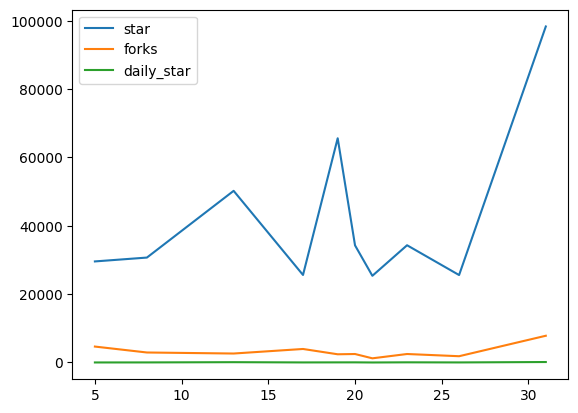

In [43]:
popular_repo = df.loc[df['star'] > df['star'].mean()]
popular_repo.head(10).plot()

In [44]:
popular_repo.head()

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
5,v2fly,v2ray-core,https://github.com/v2fly/v2ray-core,A platform for building proxies to bypass netw...,Go,29573.0,4663.0,12,2024-11-17,go
8,milvus-io,milvus,https://github.com/milvus-io/milvus,"A cloud-native vector database, storage for ne...",Go,30702.0,2927.0,23,2024-11-17,go
13,FiloSottile,mkcert,https://github.com/FiloSottile/mkcert,A simple zero-config tool to make locally trus...,Go,50227.0,2626.0,94,2024-11-17,go
17,XTLS,Xray-core,https://github.com/XTLS/Xray-core,"Xray, Penetrates Everything. Also the best v2r...",Go,25613.0,3956.0,21,2024-11-17,go
19,junegunn,fzf,https://github.com/junegunn/fzf,🌸 A command-line fuzzy finder,Go,65610.0,2405.0,37,2024-11-17,go


In [45]:
daily_star = duplicate_df['daily_star']
daily_star.describe()

count    12432.000000
mean        76.185972
std        239.753693
min          0.000000
25%          5.000000
50%         15.000000
75%         50.000000
max       8559.000000
Name: daily_star, dtype: float64

<Axes: >

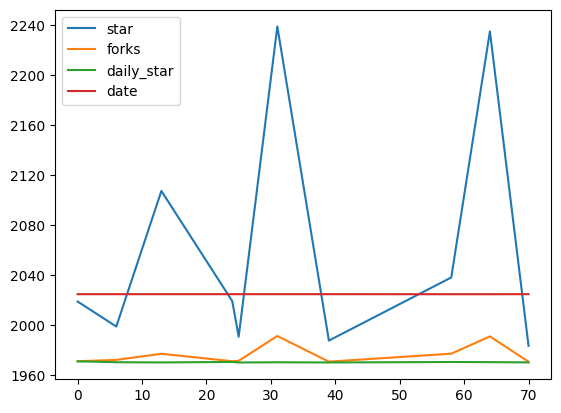

In [46]:
popular_daily_star = duplicate_df.loc[daily_star > daily_star.mean()]
popular_daily_star.head(10).plot()

<Axes: >

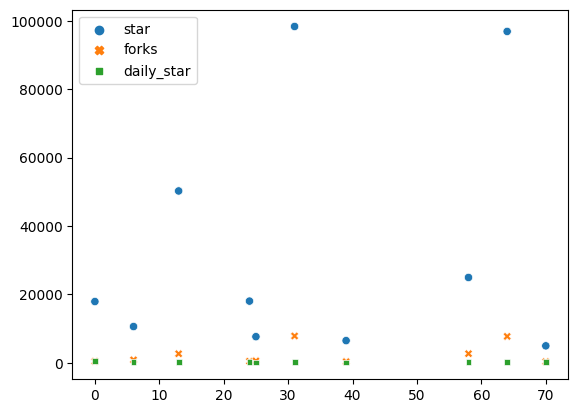

In [47]:
sns.scatterplot(data=popular_daily_star.head(10))

<Axes: xlabel='count', ylabel='language'>

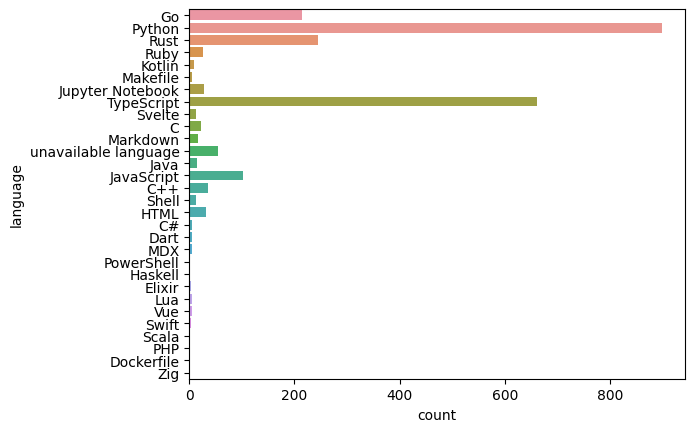

In [48]:
sns.countplot(data=popular_daily_star, y='language')

In [49]:
lan_col = duplicate_df.loc[duplicate_df.trending_category.isin(['Python', 'TypeScript'])]

In [50]:
lan_col

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category


Text(0.5, 1.0, 'Star Vs Daily Star')

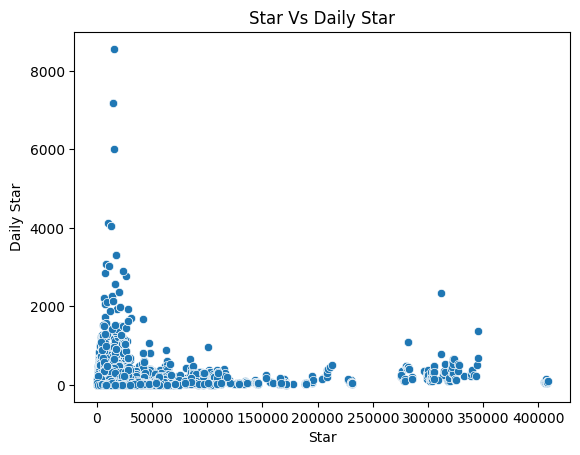

In [51]:
sns.scatterplot(data=duplicate_df, x='star', y='daily_star')
plt.xlabel('Star')
plt.ylabel('Daily Star')
plt.title('Star Vs Daily Star')

In [52]:
duplicate_df.head()

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
4,JanDeDobbeleer,oh-my-posh,https://github.com/JanDeDobbeleer/oh-my-posh,The most customisable and low-latency cross pl...,Go,17450.0,2390.0,16,2024-11-17,go


In [53]:
# numeric_values = df.loc[duplicate_df[['star'], ['forks'],['daily_star']]]
correlation_matrix = duplicate_df[['star', 'forks', 'daily_star']]
correlation_matrix.corr()

,star,forks,daily_star
star,1.000000,0.797488,0.075284
forks,0.797488,1.000000,0.009853
daily_star,0.075284,0.009853,1.000000


<Axes: >

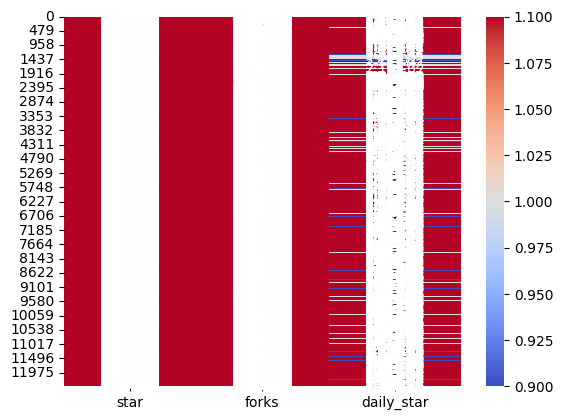

In [54]:
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', vmin=1, vmax=1)

### Number of Repo by language

<Axes: xlabel='language'>

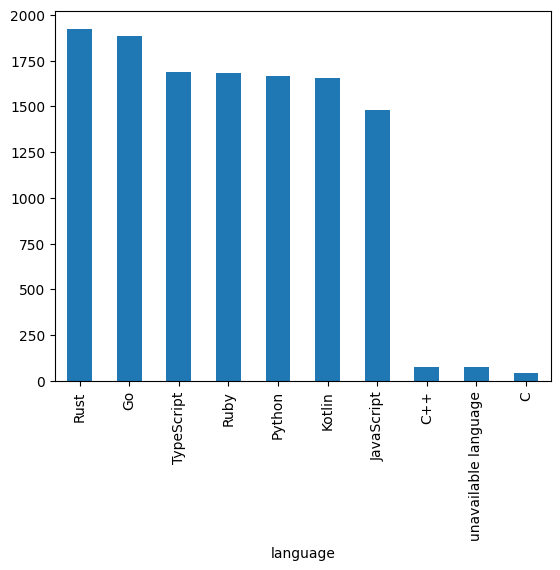

In [55]:
lang_count = duplicate_df['language'].value_counts()
lang_count[:10].plot(kind='bar')

<Axes: title={'center': 'Star VS Fork'}, xlabel='star', ylabel='forks'>

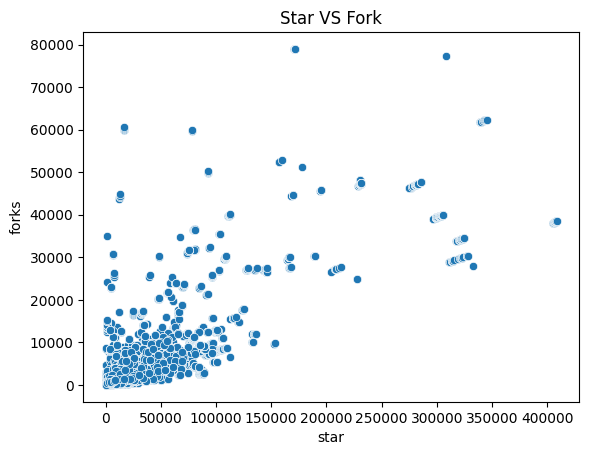

In [56]:
plt.title('Star VS Fork')
sns.scatterplot(x=duplicate_df['star'], y=duplicate_df['forks'])


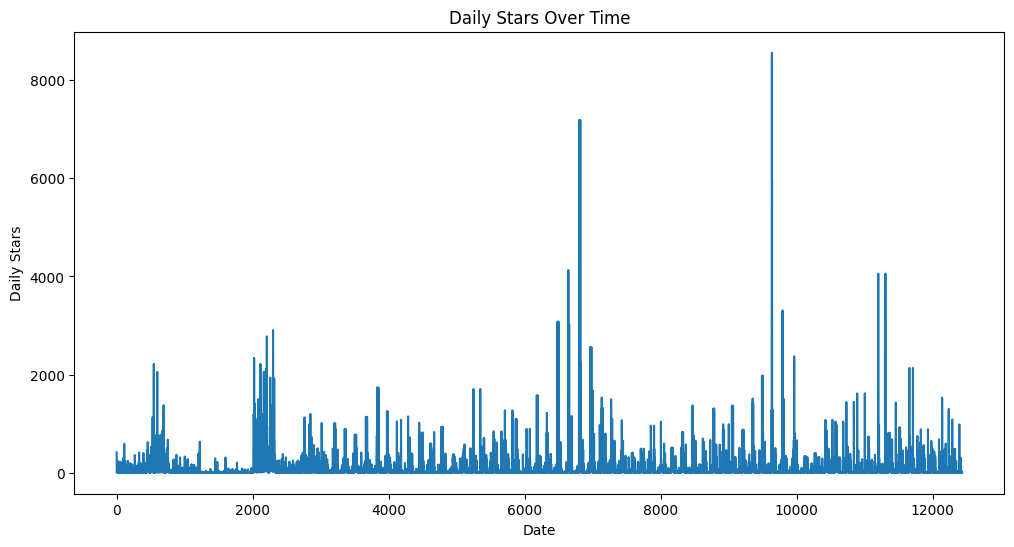

In [57]:
# duplicate_df.set_index('date', inplace=True)
duplicate_df['daily_star'].plot(figsize=(12,6))
plt.title('Daily Stars Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Stars')
plt.show()

### Preparing Data for Prediction

In [58]:
from sklearn.preprocessing import LabelEncoder

# encode categorical columns into numeric 
label_encoder = LabelEncoder()
duplicate_df['language_encoded'] = label_encoder.fit_transform(duplicate_df['language'])
duplicate_df['trending_category_encoded'] = label_encoder.fit_transform(duplicate_df['trending_category'])
duplicate_df[600:650]

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category,language_encoded,trending_category_encoded
600,QwenLM,Qwen2.5-Coder,https://github.com/QwenLM/Qwen2.5-Coder,"Qwen2.5-Coder is the code version of Qwen2.5, ...",Python,2309.0,149.0,323,2024-11-15,python,25,3
601,blacklanternsecurity,bbot,https://github.com/blacklanternsecurity/bbot,A recursive internet scanner for hackers.,Python,5232.0,453.0,330,2024-11-15,python,25,3
602,hiyouga,LLaMA-Factory,https://github.com/hiyouga/LLaMA-Factory,Unified Efficient Fine-Tuning of 100+ LLMs (AC...,Python,34347.0,4234.0,65,2024-11-15,python,25,3
603,explodinggradients,ragas,https://github.com/explodinggradients/ragas,Supercharge Your LLM Application Evaluations 🚀,Python,7220.0,737.0,12,2024-11-15,python,25,3
604,roboflow,supervision,https://github.com/roboflow/supervision,We write your reusable computer vision tools. 💜,Python,24187.0,1796.0,55,2024-11-15,python,25,3
605,huggingface,text-generation-inference,https://github.com/huggingface/text-generation...,Large Language Model Text Generation Inference,Python,9092.0,1069.0,19,2024-11-15,python,25,3
606,spack,spack,https://github.com/spack/spack,A flexible package manager that supports multi...,Python,4392.0,2282.0,79,2024-11-15,python,25,3
607,google-deepmind,alphafold,https://github.com/google-deepmind/alphafold,Open source code for AlphaFold 2.,Python,12849.0,2282.0,11,2024-11-15,python,25,3
608,LibraHp,GetQzonehistory,https://github.com/LibraHp/GetQzonehistory,获取QQ空间发布的历史说说,Python,5240.0,389.0,307,2024-11-15,python,25,3
609,Azure-Samples,graphrag-accelerator,https://github.com/Azure-Samples/graphrag-acce...,One-click deploy of a Knowledge Graph powered ...,Python,1859.0,307.0,3,2024-11-15,python,25,3


### Split data into training and testing sets

In [59]:
from sklearn.model_selection import train_test_split

X = duplicate_df[['star', 'forks', 'daily_star', 'language_encoded', 'trending_category_encoded']]
y = duplicate_df['star']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)